In [1]:
#from vpltkdisplay import *
%gui qt

In [2]:
import numpy as np

length_data = [0., 0.03, 0.05, 0.16], [0., 0., 0.01, 0.13]

def radial(v=300):
    xr = [0., 0.015, 0.03, 0.045, 0.06, 0.075, 0.09, 0.105, 0.135, 0.15, 0.16]
    yr = [v]*len(xr)
    return xr, yr

# radial
r = {}
r['col'] = radial(300)
r['pip2122'] = radial(239)
r['esk11'] = radial(373)
r['esk15'] = radial(518)
r['irx34'] = radial(300)



# Axial Conductivity for different genotypes

In [3]:
# axial
a={}
a['col'] = (
    [0., 0.03,  0.06, 0.09, 0.12, 0.15, 0.18], 
    [2.9e-4, 34.8e-4, 147.4e-4, 200.3e-4,292.6e-4,262.5e-4,511.1e-4]
)

a['esk11'] = (
    [0., 0.03,  0.06, 0.09, 0.12], 
    [2.3e-4, 15.9e-4, 158.9e-4, 216.4e-4,192.e-4]
)

a['esk15'] = (
    [0., 0.03,  0.06, 0.09, 0.12, 0.15], 
    [0.7e-4, 3.9e-4, 168.8e-4, 220.5e-4,239.3e-4, 219.5e-4]
)

a['irx34'] = (
    [0., 0.03,  0.06, 0.09, 0.12], 
    [5.2e-4, 11.4e-4, 19.8e-4, 119.6e-4,359.9e-4]
)

a['pip2122'] = a['col']

# Root length

In [4]:
# length
l={}
nn={}
l['col'] = [0., 0.03, 0.05, 0.16], [0., 0., 0.01, 0.13]
nn['col'] = 0.1150

l['esk11'] = [0., 0.02, 0.05, 0.09, 0.13], [0., 0., 0.001, 0.045, 0.089]
nn['esk11'] = 0.1050

l['esk15'] = [0., 0.02, 0.08, 0.10, 0.16], [0., 0., 0.005, 0.02, 0.065]
nn['esk15'] = 0.1467 

l['irx34'] = [0., 0.02, 0.05, 0.09, 0.13], [0., 0., 0.005, 0.03, 0.055]
nn['irx34'] = 0.1200

l['pip2122'] = l['col']
nn['pip2122'] = 0.1500

length_data = l['col']
n = nn['col']


# Hydroroot model

TODO
====
  - Explicit all the parameters to avoid any side effect


In [5]:
from hydroroot.main import hydroroot 

mtgs = []
for genotype in ['col',]:# 'esk11', 'esk15']:#, 'irx34', 'pip2122']:
    length_data = l[genotype]
    axial_conductivity_data = a[genotype]
    radial_conductivity_data = r[genotype]
    n = nn[genotype]
    # TEST
    for n in (0.115, 0.135, 0.155, 0.16, 0.18):
    #for n in (0.125,):
        seed = 2
        g, surface, volume, Keq, Jv_global = hydroroot(
        seed=seed,
        primary_length = n,
        length_data=length_data, 
        axial_conductivity_data=axial_conductivity_data, 
        radial_conductivity_data=radial_conductivity_data,
        )
        mtgs.append(g)
        print genotype, 'volume:', volume,'Keq:', Keq, 'Jv:', Jv_global, Jv_global/volume


col volume: 3.97651607016e-08 Keq: 0.283415231398 Jv: 0.0850245694193 2138167.37866
col volume: 1.46134867245e-07 Keq: 0.774319074957 Jv: 0.232295722487 1589598.20382
col volume: 4.68431231533e-07 Keq: 1.18925306229 Jv: 0.356775918686 761639.905004


MemoryError: 

In [ ]:
from hydroroot import display as dis

In [64]:
%gui qt
from openalea.plantgl.all import *
#for g in mtgs:
scene = dis.plot(mtgs[0], r_base=1e-4, r_tip=5e-5, prop_cmap='j', lognorm=False)
    #display(PlantGL(scene))
Viewer.display(scene)

In [8]:
g = mtgs[0]
l = g.vertices(scale=g.max_scale())

In [9]:
from openalea.mtg import algo
orders = algo.orders(g)

In [12]:
l = [ k for k, o in orders.iteritems() if o == 5]

In [14]:
sum(g.node(v).length for v in l)

0

In [15]:
g.property_names()

['J_out',
 'k0',
 'color',
 'k',
 'K',
 'j',
 'label',
 'psi_in',
 'length',
 'edge_type',
 'radius',
 'Keq',
 'position',
 'psi_out',
 'relative_position',
 'order',
 'position_index']

In [80]:
g0, g1, g2, g3, g4 = mtgs
g = g2
from openalea.mtg.traversal import pre_order2
length= {}
root = 1
dl = 1.e-4
for v in pre_order2(g,1):
    pid = g.parent(v)
    length[v] = length[pid]+dl if pid else dl

def nb_root(l):
    count = 0
    for v in g:
        pid = g.parent(v)
        if pid and (length[pid] <= l <= length[v]):
            count+=1
    return count

In [71]:
max(length.values())

0.11500000000000227

In [43]:
dist = (0.045, 0.055, 0.095, 0.105)
map(nb_root, dist)

[522, 375, 40, 11]

In [45]:
dist = (0.045, 0.055, 0.095, 0.105)
map(nb_root, dist)

[1992, 2288, 433, 223]

In [47]:
dist = (0.045, 0.055, 0.095, 0.105)
map(nb_root, dist)

[1536, 1940, 414, 190]

In [49]:
dist = (0.045, 0.055, 0.095, 0.105)
map(nb_root, dist)

[5407, 8391, 3914, 2169]

In [52]:
#g0
dist = (0.045, 0.055, 0.095, 0.105)
map(nb_root, dist)

[68, 33, 1, 1]

In [68]:
#12.5
dist = (0.045, 0.055, 0.095, 0.105)
map(nb_root, dist)

[254, 197, 10, 4]

In [72]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


(array([   2752.,   61639.,  233646.,  345774.,  278160.,  137548.,
          48229.,   13875.,    2150.,     449.]),
 array([  1.00000000e-04,   1.55900000e-02,   3.10800000e-02,
          4.65700000e-02,   6.20600000e-02,   7.75500000e-02,
          9.30400000e-02,   1.08530000e-01,   1.24020000e-01,
          1.39510000e-01,   1.55000000e-01]),
 <a list of 10 Patch objects>)

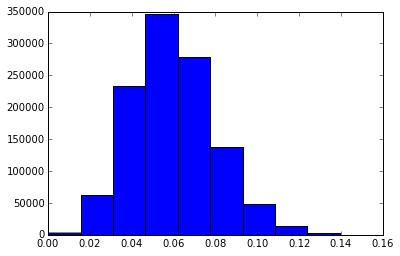

In [81]:
hist(length.values())

In [79]:
len(g)

1124223

In [82]:
from openalea.mtg import algo
orders = algo.orders(g)